In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import lightgbm as lgbm
from lightgbm import Booster
import structureboost as stb
import ml_insights as mli
from structureboost import log_loss
pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',1000)

In [4]:
mainDf = pd.read_csv('CombinedWithWinDashesChanged.csv')
print(mainDf.shape)

(16073, 969)


In [5]:
irrelevant_stats = [
    "date", 
    "gamePk", 
    "total_1_home", 
    "pitch_percentage_1_home", 
    "total_vs_hand_1_home", 
    "pitch_percentage_vs_hand_1_home", 
    "total_2_home", 
    "pitch_percentage_2_home", 
    "total_vs_hand_2_home", 
    "pitch_percentage_vs_hand_2_home", 
    "total_3_home", 
    "pitch_percentage_3_home", 
    "total_vs_hand_3_home", 
    "pitch_percentage_vs_hand_3_home", 
    "total_4_home", 
    "pitch_percentage_4_home", 
    "total_vs_hand_4_home", 
    "pitch_percentage_vs_hand_4_home", 
    "total_5_home", 
    "pitch_percentage_5_home", 
    "total_vs_hand_5_home", 
    "pitch_percentage_vs_hand_5_home", 
    "total_6_home", 
    "pitch_percentage_6_home", 
    "total_vs_hand_6_home", 
    "pitch_percentage_vs_hand_6_home", 
    "total_7_home", 
    "pitch_percentage_7_home", 
    "total_vs_hand_7_home", 
    "pitch_percentage_vs_hand_7_home", 
    "total_8_home", 
    "pitch_percentage_8_home", 
    "total_vs_hand_8_home", 
    "pitch_percentage_vs_hand_8_home", 
    "total_9_home", 
    "pitch_percentage_9_home", 
    "total_vs_hand_9_home", 
    "pitch_percentage_vs_hand_9_home", 
    "total_pitch_home", 
    "pitch_percentage_pitch_home", 
    "total_pitch_home_1", 
    "pitch_percentage_pitch_home_1", 
    "total_bullpen_home", 
    "pitch_percentage_bullpen_home", 
    "total_1_away", 
    "pitch_percentage_1_away", 
    "total_vs_hand_1_away", 
    "pitch_percentage_vs_hand_1_away", 
    "total_2_away", 
    "pitch_percentage_2_away", 
    "total_vs_hand_2_away", 
    "pitch_percentage_vs_hand_2_away", 
    "total_3_away", 
    "pitch_percentage_3_away", 
    "total_vs_hand_3_away", 
    "pitch_percentage_vs_hand_3_away", 
    "total_4_away", 
    "pitch_percentage_4_away", 
    "total_vs_hand_4_away", 
    "pitch_percentage_vs_hand_4_away", 
    "total_5_away", 
    "pitch_percentage_5_away", 
    "total_vs_hand_5_away", 
    "pitch_percentage_vs_hand_5_away", 
    "total_6_away", 
    "pitch_percentage_6_away", 
    "total_vs_hand_6_away", 
    "pitch_percentage_vs_hand_6_away", 
    "total_7_away", 
    "pitch_percentage_7_away", 
    "total_vs_hand_7_away", 
    "pitch_percentage_vs_hand_7_away", 
    "total_8_away", 
    "pitch_percentage_8_away", 
    "total_vs_hand_8_away", 
    "pitch_percentage_vs_hand_8_away", 
    "total_9_away", 
    "pitch_percentage_9_away", 
    "total_vs_hand_9_away", 
    "pitch_percentage_vs_hand_9_away", 
    "total_pitch_away", 
    "pitch_percentage_pitch_away", 
    "total_pitch_away_1", 
    "pitch_percentage_pitch_away_1", 
    "total_bullpen_away", 
    "pitch_percentage_bullpen_away"
]

print(mainDf.shape)

mainDf = mainDf.drop(labels = irrelevant_stats, axis = 'columns')
#batterStatsToCombine = ["k_percentage_","bb_percentage_","ba_","xba_","obp_","xobp_","slg_","xslg_","woba_","xwoba_","babip_","iso_","ev_","adj_ev_","launch_angle_","hard_hit_percentage_","k_percentage_vs_hand_","bb_percentage_vs_hand_","ba_vs_hand_","xba_vs_hand_","obp_vs_hand_","xobp_vs_hand_","slg_vs_hand_","xslg_vs_hand_","woba_vs_hand_","xwoba_vs_hand_","babip_vs_hand_","iso_vs_hand_","ev_vs_hand_","adj_ev_vs_hand_","launch_angle_vs_hand_","hard_hit_percentage_vs_hand_"]
#homeAway = ["_home", "_away"]
#print(mainDf)
#for ind in mainDf.index:
#    for team in homeAway:
#        for stat in batterStatsToCombine:
#            ave = 0
#            numStats = 0
#           for i in range(1, 10):
##                col = stat + str(i) + team
#                indStat = mainDf[col][ind]
#                if indStat > 0:
 #                   ave += indStat
  #                  numStats += 1
   #         ave = ave / numStats
    #        col = stat + "1" + team
     #       print(ave)
      #      mainDf[col][ind] = ave
#print(mainDf)
 
oddsDf = pd.read_csv('DashesChangedOddsDataTest.csv')

trainX = mainDf.iloc[:13000,:]
validX = mainDf.iloc[13000:14500,:]
testX = mainDf.iloc[14500:,:]

trainY = trainX['home_win'].to_numpy()
validY = validX['home_win'].to_numpy()
testY = testX['home_win'].to_numpy()

trainX = trainX.drop("home_win", axis='columns')
validX = validX.drop("home_win", axis='columns')
testX = testX.drop("home_win", axis='columns')

#print(train)
print(mainDf.shape)
print(trainX.shape)
#print(valid)
print(validX.shape)
#print(test)
print(testX.shape)


(16073, 969)
(16073, 883)
(13000, 882)
(1500, 882)
(1573, 882)


In [6]:
lgbm1 = lgbm.LGBMClassifier(n_estimators=1000, learning_rate=.02, max_depth=2)
lgbm1.fit(trainX, trainY, eval_set=(validX, validY), eval_metric='logloss', 
          callbacks=[lgbm.early_stopping(stopping_rounds=50), lgbm.log_evaluation(10)])
#lgbm1.booster_.save_model('NoFeatureEngineering.txt')

In [8]:

hv_mean = mainDf['home_win'].sum() / 16074
testX = testX.astype(float)
preds_lgbm = lgbm1.predict_proba(testX)[:,1]
log_loss(testY, preds_lgbm), log_loss(testY, oddsDf.combinedOdds), log_loss(testY, hv_mean*np.ones(len(testY)))

AttributeError: 'Booster' object has no attribute 'predict_proba'

In [9]:
ll_test = log_loss(testY, preds_lgbm)
preds_lgbm_test = lgbm1.predict_proba(testX)[:,1]
sv_lgbm = lgbm1.predict(testX, pred_contrib=True)
sv_lgbm = pd.DataFrame(sv_lgbm)
sv_lgbm.columns = list(testX.columns)+['Intercept']
sv_vec = sv_lgbm.abs().mean().sort_values(ascending=False)
print('\nAvg Shap Vals')
    
print(sv_vec)   


NameError: name 'preds_lgbm' is not defined

AttributeError: 'Booster' object has no attribute 'predict_proba'

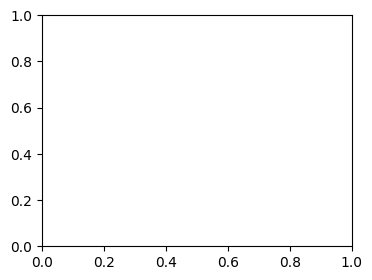

In [10]:
rd = mli.get_range_dict(trainX)
plot_pts = testX.sample(3, random_state=42)
mli.ice_plot(lgbm1, plot_pts, 'woba_pitch_away', mli.get_range_dict(trainX), plots_per_row=2)
#print(testX.columns[832])
plt.figure(figsize=(16,6))
mli.plot_reliability_diagram(testY, preds_lgbm, show_histogram=True);

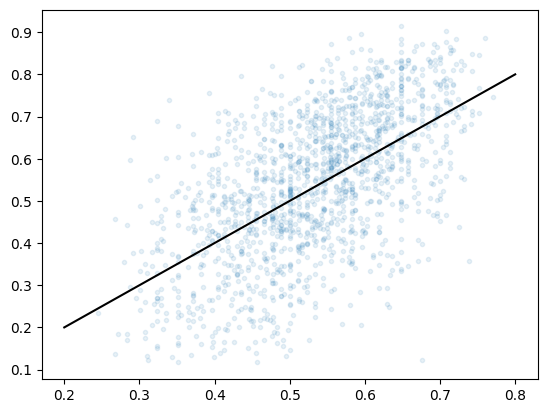

In [ ]:
plt.scatter(oddsDf.combinedOdds, preds_lgbm, marker='.', alpha=.1)
plt.plot([.2,.8],[.2,.8], color='k')



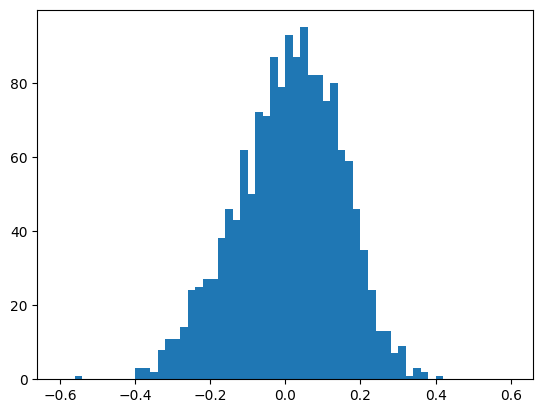

In [ ]:

test_disc = preds_lgbm - oddsDf.combinedOdds
plt.hist(test_disc, bins=np.linspace(-.6,.6,61));

In [ ]:
curTestX = pd.read_csv('afterAllStarGame.csv')
#curTestOddsDf = pd.read_csv('2024testWithOdds.csv')
irrelevant_stats = [
    "date", 
    "gamePk", 
    "total_1_home", 
    "pitch_percentage_1_home", 
    "total_vs_hand_1_home", 
    "pitch_percentage_vs_hand_1_home", 
    "total_2_home", 
    "pitch_percentage_2_home", 
    "total_vs_hand_2_home", 
    "pitch_percentage_vs_hand_2_home", 
    "total_3_home", 
    "pitch_percentage_3_home", 
    "total_vs_hand_3_home", 
    "pitch_percentage_vs_hand_3_home", 
    "total_4_home", 
    "pitch_percentage_4_home", 
    "total_vs_hand_4_home", 
    "pitch_percentage_vs_hand_4_home", 
    "total_5_home", 
    "pitch_percentage_5_home", 
    "total_vs_hand_5_home", 
    "pitch_percentage_vs_hand_5_home", 
    "total_6_home", 
    "pitch_percentage_6_home", 
    "total_vs_hand_6_home", 
    "pitch_percentage_vs_hand_6_home", 
    "total_7_home", 
    "pitch_percentage_7_home", 
    "total_vs_hand_7_home", 
    "pitch_percentage_vs_hand_7_home", 
    "total_8_home", 
    "pitch_percentage_8_home", 
    "total_vs_hand_8_home", 
    "pitch_percentage_vs_hand_8_home", 
    "total_9_home", 
    "pitch_percentage_9_home", 
    "total_vs_hand_9_home", 
    "pitch_percentage_vs_hand_9_home", 
    "total_pitch_home", 
    "pitch_percentage_pitch_home", 
    "total_pitch_home_1", 
    "pitch_percentage_pitch_home_1", 
    "total_bullpen_home", 
    "pitch_percentage_bullpen_home", 
    "total_1_away", 
    "pitch_percentage_1_away", 
    "total_vs_hand_1_away", 
    "pitch_percentage_vs_hand_1_away", 
    "total_2_away", 
    "pitch_percentage_2_away", 
    "total_vs_hand_2_away", 
    "pitch_percentage_vs_hand_2_away", 
    "total_3_away", 
    "pitch_percentage_3_away", 
    "total_vs_hand_3_away", 
    "pitch_percentage_vs_hand_3_away", 
    "total_4_away", 
    "pitch_percentage_4_away", 
    "total_vs_hand_4_away", 
    "pitch_percentage_vs_hand_4_away", 
    "total_5_away", 
    "pitch_percentage_5_away", 
    "total_vs_hand_5_away", 
    "pitch_percentage_vs_hand_5_away", 
    "total_6_away", 
    "pitch_percentage_6_away", 
    "total_vs_hand_6_away", 
    "pitch_percentage_vs_hand_6_away", 
    "total_7_away", 
    "pitch_percentage_7_away", 
    "total_vs_hand_7_away", 
    "pitch_percentage_vs_hand_7_away", 
    "total_8_away", 
    "pitch_percentage_8_away", 
    "total_vs_hand_8_away", 
    "pitch_percentage_vs_hand_8_away", 
    "total_9_away", 
    "pitch_percentage_9_away", 
    "total_vs_hand_9_away", 
    "pitch_percentage_vs_hand_9_away", 
    "total_pitch_away", 
    "pitch_percentage_pitch_away", 
    "total_pitch_away_1", 
    "pitch_percentage_pitch_away_1", 
    "total_bullpen_away", 
    "pitch_percentage_bullpen_away"
]
curTestX = curTestX.drop(labels = irrelevant_stats, axis = 'columns')
#print(curTestX.columns)
#curTestX = curTestX.drop(labels = ['homeDec', 'awayDec', 'combinedOdds'], axis = 'columns')
curTestY = curTestX['home_win'].to_numpy()
curTestX = curTestX.drop("home_win", axis='columns')
model = lgbm.Booster(model_file='NoFeatureEngineering.txt')
curTest_preds = model.predict(curTestX)
print(curTest_preds)
#curTest_preds = lgbm1.predict_proba(curTestX)[:,1]
log_loss(curTestY, curTest_preds)#, log_loss(curTestY, curTestOddsDf.combinedOdds)

[0.6017821  0.58331945 0.3172806  0.48547039 0.73359795 0.64281775
 0.57418975 0.56869803 0.82619852 0.80244171 0.6290017  0.73364362
 0.57453321 0.51664033 0.54658367 0.63470694 0.457958   0.5922677
 0.55776397 0.35784318 0.25988856 0.53168082 0.24881876 0.25742851
 0.42288045 0.52432082 0.7290191  0.19513308 0.72056008 0.74119902
 0.68986388 0.58719973 0.69544735 0.59042335 0.51361713 0.52724054
 0.42360452 0.61772725 0.68759511 0.65606376 0.44722474 0.59091923
 0.41227457 0.23109759 0.87262803 0.58505236 0.72803376 0.49829666
 0.51512396 0.62904114 0.52140629 0.77999136 0.44319254 0.56294124
 0.55780357 0.6197833  0.61995664 0.29168943 0.3013033  0.53965797
 0.62893849 0.63244893 0.46802065 0.38652066 0.51323978 0.32633047
 0.45916897 0.41957154 0.36136307 0.33858933 0.47343872 0.58008677
 0.50909079 0.2983178  0.75306669 0.45232891 0.53724862 0.61329746
 0.84996071 0.78314636 0.39701732 0.25326302 0.65304725 0.68421741
 0.65200431 0.67446983 0.55746552 0.44539794 0.74278249 0.32865

0.5987764287189068

In [ ]:
def buildBetCsv(predsnp, testXDf, testYnp, oddsDf):
    predsDf = pd.DataFrame(data = predsnp, columns = ["home_win_preds"])
    testYDf = pd.DataFrame(data = testYnp, columns = ["home_win"])
    testXDf = testXDf.reset_index()
    #print(testXDf)
    #print(predsDf)
    justOddsDf = oddsDf.filter(['homeDec', 'awayDec', 'combinedOdds'])
    #print(justOddsDf)
    #print(oddsDf["homeDec", "awayDec","combinedOdds"])
    betAnalysis = pd.concat([testXDf, testYDf, justOddsDf, predsDf], axis = 1)
    betAnalysis = betAnalysis.drop("index", axis='columns')

    #print(betAnalysis)

    betDf = pd.DataFrame(data = [], columns = ["home_bet", "away_bet", "home_net", "away_net", "net_bets"])
    
    for ind in betAnalysis.index:
        homeWin = float(betAnalysis['home_win'][ind])
        predOddsHome = float(betAnalysis['home_win_preds'][ind])
        predOddsAway = 1 - predOddsHome
        homeLine = float(betAnalysis['homeDec'][ind])
        awayLine = float(betAnalysis['awayDec'][ind])
        homeBet = 0
        awayBet = 0

        if predOddsHome - homeLine < 0:
            homeBet = 1
        if predOddsAway - awayLine < 0:
            awayBet = 1
        awayBet = 1
       
        #print(int(betAnalysis['awayDec'][ind]))

        if homeWin == 1:
            homeNet = (homeBet / homeLine) - homeBet
            awayNet = (-1 * awayBet)
        if homeWin == 0:
            awayNet = (awayBet / awayLine) - awayBet
            homeNet = (-1 * homeBet)

        gameNet = homeNet + awayNet
        ev = 0
        if homeBet > 0:
            ev = (predOddsHome * ((homeBet / homeLine) - homeBet)) - (predOddsAway * homeBet)
        elif awayBet > 0:
            ev = (predOddsAway * ((awayBet / awayLine) - awayBet)) - (predOddsHome * awayBet)

        betData = [homeBet, awayBet, homeNet, awayNet, gameNet, ev]
        curGameBet = pd.DataFrame([betData], columns = ["home_bet", "away_bet", "home_net", "away_net", "net_bets", "expected_value"])
        betDf = pd.concat([betDf, curGameBet], axis=0)
    
    #print(betAnalysis.columns)
    #print(betDf.columns)
    #betAnalysis = pd.concat([betAnalysis, betDf], axis=1)
    return betDf

#print(testX)
#print(curTest_preds)
test = buildBetCsv(curTest_preds, curTestX, curTestY, curTestOddsDf)
#test = buildBetCsv(preds_lgbm, testX, testY, oddsDf)
print(test['net_bets'].sum())
print(test['expected_value'].sum())
counts = 0
for bet in test['net_bets']:
    if bet > 0:
        counts+=1

print(counts)

test.to_csv('simulatedBets.csv', index=False)


C:\Users\nhleo\AppData\Local\Temp\ipykernel_20532\3320426992.py:50: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  betDf = pd.concat([betDf, curGameBet], axis=0)


-149.84939405674749
-193.88935632141096
269
